# Syed Hamza Ali

# Sentiment Analysis of Financial News Headlines
## This task applies NLP techniques to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Imports

In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns

## 1. Download the dataset

In [67]:
url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv'

# Read the CSV file from the URL into a DataFrame
try:
    df = pd.read_csv(url, encoding='latin-1')
    print("Dataset downloaded successfully.")
except Exception as e:
    print("Failed to download the dataset:", e)

Dataset downloaded successfully.


## 2. Load the dataset 

In [68]:
# Removing first column (id)
h_cols = ['sentiment', 'headline']

# Read the CSV file from the URL into a DataFrame
try:
    news_headline = pd.read_csv(url, sep=',', names=h_cols, encoding='latin-1')
    print("Dataset loaded successfully.")

    # Display the first few rows of the DataFrame
    print(news_headline.head())

    # Get information about the DataFrame
    print(news_headline.info())

    # Perform any further analysis or manipulation with the DataFrame as needed

except Exception as e:
    print("Failed to load the dataset:", e)

Dataset loaded successfully.
  sentiment                                           headline
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   headline   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None


## 3. Explore the dataset

In [69]:
# 1. Displaying the shape of the DataFrame
print("Shape of the DataFrame:")
print(news_headline.shape)

# 2. Displaying the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(news_headline.head())

# 3. Getting information about the DataFrame
print("\nInformation about the DataFrame:")
print(news_headline.info())

# 4. Checking for missing values
print("\nMissing values in the DataFrame:")
print(news_headline.isnull().sum())

# 5. Checking unique values and value counts for categorical variables
print("\nUnique values and value counts for 'sentiment' column:")
print(news_headline['sentiment'].value_counts())

Shape of the DataFrame:
(4846, 2)

First few rows of the DataFrame:
  sentiment                                           headline
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   headline   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None

Missing values in the DataFrame:
sentiment    0
headline     0
dtype: int64

Unique values and value counts for 'sentiment' column:
neutral     2879
positive    1363
negative     604
Name: sentiment, dtype: int6

## 4. Clean the data 

In [70]:
# Check for null values
if news_headline.isnull().sum().any():
    news_headline = news_headline.dropna()  # or fill them with appropriate values

# Remove duplicates
news_headline = news_headline.drop_duplicates()

# Clean the text data
news_headline['headline'] = news_headline['headline'].str.replace('[^\w\s]','')  # remove punctuation
news_headline['headline'] = news_headline['headline'].str.lower()  # convert to lowercase

# Print shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame:")
print(news_headline.shape)

# Display the first few rows of the cleaned DataFrame
print("\nFirst few rows of the cleaned DataFrame:")
print(news_headline.head())

# Display value counts for 'sentiment' column
print("\nValue counts for 'sentiment' column:")
print(news_headline['sentiment'].value_counts())

Shape of the cleaned DataFrame:
(4840, 2)

First few rows of the cleaned DataFrame:
  sentiment                                           headline
0   neutral  according to gran  the company has no plans to...
1   neutral  technopolis plans to develop in stages an area...
2  negative  the international electronic industry company ...
3  positive  with the new production plant the company woul...
4  positive  according to the company s updated strategy fo...

Value counts for 'sentiment' column:
neutral     2873
positive    1363
negative     604
Name: sentiment, dtype: int64


<ipython-input-70-ca6b8336d875>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  news_headline['headline'] = news_headline['headline'].str.replace('[^\w\s]','')  # remove punctuation


## 5. SMOTE (Imbalanced dataset)

In [71]:
# Separate features (X) and target variable (y)
X = news_headline['headline']  # Assuming 'headline' column contains text data
y = news_headline['sentiment']

# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

smote = SMOTE()

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X_vectorized, y)

resampled_df = pd.DataFrame(X_resampled.toarray(), columns=vectorizer.get_feature_names_out())

# Print shape of the resampled DataFrame
print("Shape of the resampled DataFrame:")
print(resampled_df.shape)

# Display value counts for 'sentiment' column in the resampled DataFrame
print("\nValue counts for 'sentiment' column in the resampled DataFrame:")
print(y_resampled.value_counts())

Shape of the resampled DataFrame:
(8619, 11219)

Value counts for 'sentiment' column in the resampled DataFrame:
neutral     2873
negative    2873
positive    2873
Name: sentiment, dtype: int64


## 6. BoW model 

In [72]:
# Separate features (X) and target variable (y)
X = news_headline['headline'].values
y = news_headline['sentiment']

# Convert text data into numerical features using CountVectorizer
c_vectorizer = CountVectorizer()
X_vectorized = c_vectorizer.fit_transform(X)

# feature names
print(c_vectorizer.get_feature_names_out())

# BoW matrix as an Array
print(X_vectorized.toarray())

['00' '000' '000063' ... 'zte' 'zu' 'ðl']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 7. Tf-idf model 

In [73]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# feature names
print(tfidf_vectorizer.get_feature_names_out())
# tfidf as an Array
print(X_tfidf.toarray())

['00' '000' '000063' ... 'zte' 'zu' 'ðl']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 8. Split train test data 

In [74]:
# Separate features (X) and target variable (y)
X = news_headline['headline']
y = news_headline['sentiment']

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=86)

# Print the shapes of the training and testing sets
# print("Training set shape:", X_train.shape, y_train.shape)
# print("Testing set shape:", X_test.shape, y_test.shape)

# USING SMOTE RESAMPLED TRAIN AND TEST PARAMETERS

# Split the resampled dataset into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=86)

# Print the shapes of the training and testing sets
print("Training set shape (SMOTE):", X_train_resampled.shape, y_train_resampled.shape)
print("Testing set shape (SMOTE):", X_test_resampled.shape, y_test_resampled.shape)

Training set shape (SMOTE): (6895, 11219) (6895,)
Testing set shape (SMOTE): (1724, 11219) (1724,)


## 9. Classification Algorithm 
- Train
- Predict

In [75]:
# Multinomial Naive Bayes model
mnb_model = MultinomialNB()
mnb_model.fit(X_train_resampled, y_train_resampled)
y_pred = mnb_model.predict(X_test_resampled)

# Calculate accuracy
accuracy = accuracy_score(y_test_resampled, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test_resampled, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred))

Accuracy: 0.6653132250580046
Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.76      0.72       576
     neutral       0.67      0.79      0.73       585
    positive       0.63      0.43      0.51       563

    accuracy                           0.67      1724
   macro avg       0.66      0.66      0.65      1724
weighted avg       0.66      0.67      0.65      1724

Confusion Matrix:
[[439  71  66]
 [ 45 465  75]
 [166 154 243]]


## 10. Another Classification Algorithm 
- Train
- Predict

In [76]:
# Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_resampled, y_train_resampled)

y_pred = logreg_model.predict(X_test_resampled)

# Calculate accuracy
accuracy = accuracy_score(y_test_resampled, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test_resampled, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred))

Accuracy: 0.7378190255220418
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.85      0.79       576
     neutral       0.80      0.75      0.78       585
    positive       0.68      0.61      0.64       563

    accuracy                           0.74      1724
   macro avg       0.74      0.74      0.73      1724
weighted avg       0.74      0.74      0.74      1724

Confusion Matrix:
[[490  29  57]
 [ 41 439 105]
 [141  79 343]]


## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods 

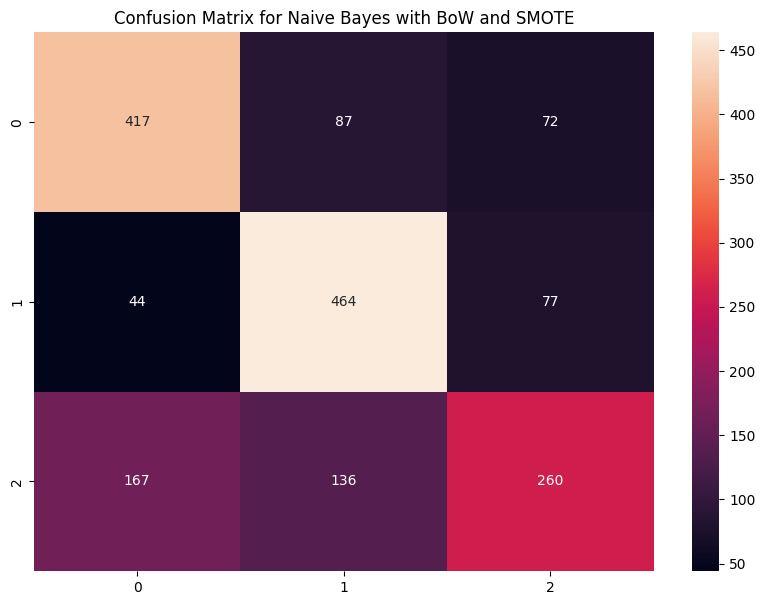

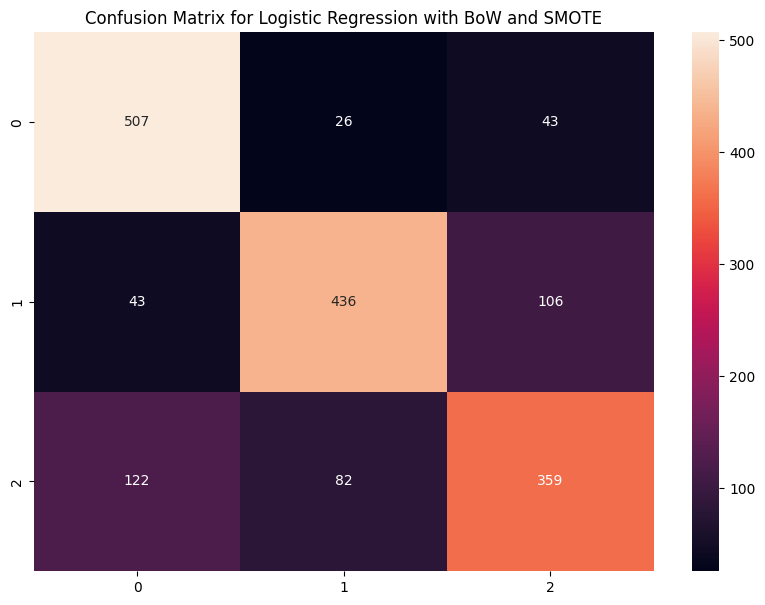

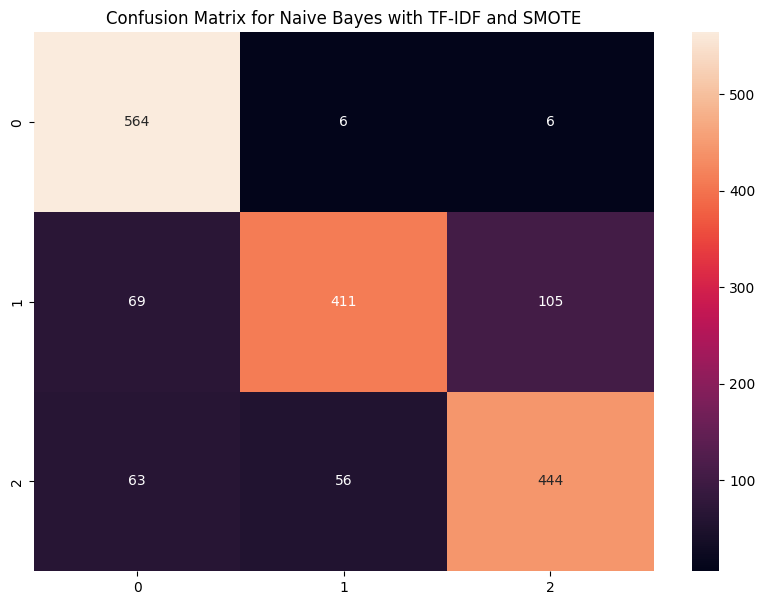

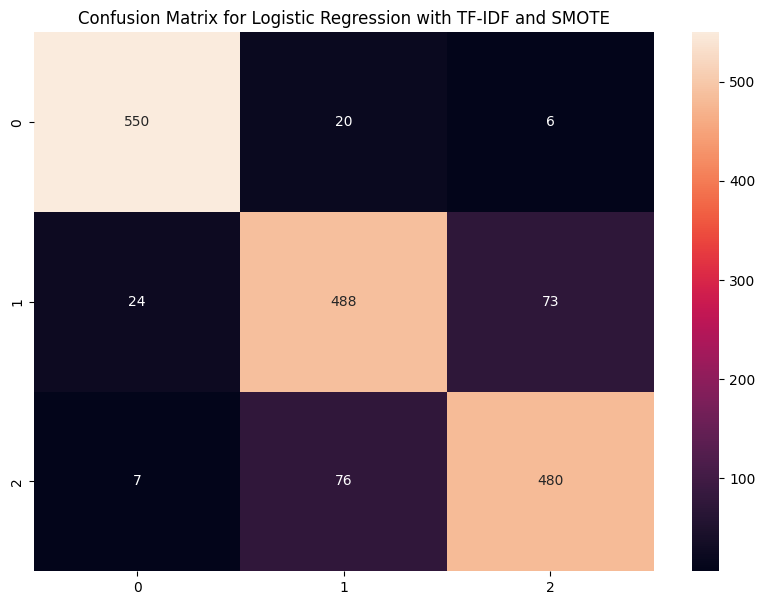

In [77]:
# Re-initializing X and y
X = news_headline['headline'].values
y = news_headline['sentiment'].values

vectorizers = {
    'BoW': CountVectorizer(),
    'TF-IDF': TfidfVectorizer()
}

classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}


for vect_name, vectorizer in vectorizers.items():
    for clf_name, clf in classifiers.items():

        features = vectorizer.fit_transform(X)

        smote = SMOTE(random_state=86)
        features_resampled, labels_resampled = smote.fit_resample(features, y)

        X_train, X_test, y_train, y_test = train_test_split(features_resampled, labels_resampled, test_size=0.2, random_state=86)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Display the confusion matrix
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt='d')
        plt.title(f'Confusion Matrix for {clf_name} with {vect_name} and SMOTE')
        plt.show()